
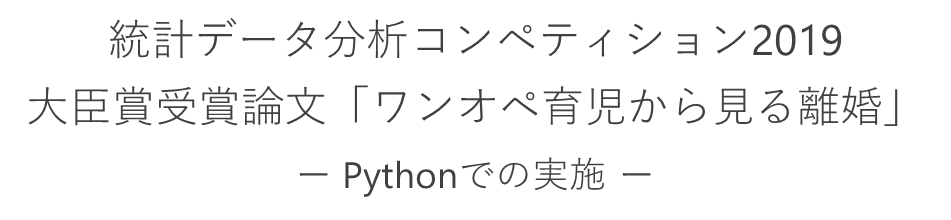

## 準備． 必要なモジュール・オプションの読み込み

In [1]:
# 必要なモジュールのimport

#基盤システム
import sys
import os
import datetime

#pandas、numpy
import pandas as pd
import numpy as np

# 統計量・根号計算の実施
import math

# 線形回帰を行なうライブラリ
from sklearn import linear_model

# 可視化を実施するmatplotlib
import matplotlib.pyplot as plt
# ノートブック上にグラフを描画する際に指定する記述
%matplotlib inline

#オプション
# 常に全ての列（カラム）を表示させる
pd.options.display.max_columns = None
pd.options.display.notebook_repr_html = True


## データの読み込みと分析のための準備

In [2]:
# SSDSE-2019A.csvの読み込み
SSDSE1 = pd.read_csv( # csvを読み込む関数
                    './in/SSDSE-2019A.csv',# ファイルを指定
                    index_col=None,  # インデックスとなる列の指定
                    engine='python', # 日本語を読み込む際の指定
                    skiprows=2, # 読み込む行の指定
                    header=0 #項目名が何行目か
                    )
# 最初の5行目までを表示する
SSDSE1.head(5)

,地域コード,都道府県,市区町村,総人口,総人口（男）,総人口（女）,日本人人口,日本人人口（男）,日本人人口（女）,１５歳未満人口,１５歳未満人口（男）,１５歳未満人口（女）,１５～６４歳人口,１５～６４歳人口（男）,１５～６４歳人口（女）,６５歳以上人口,６５歳以上人口（男）,６５歳以上人口（女）,７５歳以上人口,７５歳以上人口（男）,７５歳以上人口（女）,外国人人口,出生数,死亡数,転入者数,転出者数,世帯数,一般世帯数,一般世帯人員数,核家族世帯数,単独世帯数,６５歳以上の世帯員のいる核家族世帯数,高齢夫婦のみの世帯数,高齢単身世帯数（６５歳以上の者１人）,婚姻件数,離婚件数,総面積（北方地域及び竹島を除く）,可住地面積,事業所数,事業所数（農業，林業）,事業所数（建設業）,事業所数（製造業）,事業所数（電気・ガス・熱供給・水道業）,事業所数（情報通信業）,事業所数（運輸業，郵便業）,事業所数（卸売業，小売業）,事業所数（金融業，保険業）,事業所数（不動産業，物品賃貸業）,事業所数（学術研究，専門・技術サービス業）,事業所数（宿泊業，飲食サービス業）,事業所数（生活関連サービス業，娯楽業）,事業所数（教育，学習支援業）,事業所数（医療，福祉）,事業所数（複合サービス事業）,事業所数（サービス業（他に分類されないもの））,事業所数（公務（他に分類されるものを除く））,第１次産業事業所数,第２次産業事業所数,第３次産業事業所数,従業者数,従業者数（農業，林業）,従業者数（建設業）,従業者数（製造業）,従業者数（電気・ガス・熱供給・水道業）,従業者数（情報通信業）,従業者数（運輸業，郵便業）,従業者数（卸売業，小売業）,従業者数（金融業，保険業）,従業者数（不動産業，物品賃貸業）,従業者数（学術研究，専門・技術サービス業）,従業者数（宿泊業，飲食サービス業）,従業者数（生活関連サービス業，娯楽業）,従業者数（教育，学習支援業）,従業者数（医療，福祉）,従業者数（複合サービス事業）,従業者数（サービス業（他に分類されないもの））,従業者数（公務（他に分類されるものを除く））,第１次産業従業者数,第２次産業従業者数,第３次産業従業者数,農家数（販売農家）,農家数（自給的農家）,経常収支比率（市町村財政）,実質公債費比率（市町村財政）,歳入決算総額（市町村財政）,地方税（市町村財政）,歳出決算総額（市町村財政）,民生費（市町村財政）,土木費（市町村財政）,教育費（市町村財政）,災害復旧費（市町村財政）,幼稚園数,幼稚園在園者数,小学校数,小学校教員数,小学校児童数,中学校数,中学校教員数,中学校生徒数,高等学校数,高等学校生徒数,就業者数,就業者数（男）,就業者数（女）,完全失業者数,完全失業者数（男）,完全失業者数（女）,非労働力人口,非労働力人口（男）,非労働力人口（女）,第１次産業就業者数,第２次産業就業者数,第３次産業就業者数,公民館数,図書館数,総人口（非水洗化人口＋水洗化人口）,非水洗化人口,小売店数,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数
0,R01100,北海道,札幌市,1952356,910614,1041742,1937785,903535,1034250,221013,112743,108270,1235516,590111,645405,483534,201313,282221,225299,84053,141246,8820,13821,18668,119314,110535,921837,920415,1899980,493644,375242,178246,98660,104650,10134,4003,112126,43898,76604,103,6701,2611,68,1459,1697,18585,1420,8822,4139,10168,6427,2526,6524,303,4746,294,105,9321,67178,912841,1331,61706,38170,4390,31952,47454,195399,24911,34186,30961,87304,42136,46826,128742,7785,99791,29737,1345,99922,811574,461,346,94.7,3.7,921026080,288105811,911330611,408499847,131442999,86512433,0,116,20461,205,4887,90138,107,3001,45781,52,44201,844313,460571,383742,48619,29114,19505,651052,215570,435482,3790,118503,645868,1,11,1947127,7107,11197,8502,355,178,1329,1232,6614,2113,5398,273,25742
1,R01202,北海道,函館市,265979,120376,145603,264537,119819,144718,27131,13912,13219,152154,72223,79931,85931,33839,52092,42686,14949,27737,771,1410,3633,8748,9549,123950,123651,255149,66690,48247,29540,16258,20148,1134,551,67786,12333,13795,24,1224,612,17,100,275,3590,278,976,440,2216,1369,494,1035,104,932,86,44,1839,11912,124215,201,8728,9798,625,1270,6897,24804,3124,3174,2877,13084,6446,5599,20957,1362,10227,4725,493,18551,105171,212,157,88.9,7.5,141021970,31941606,139390594,61852111,13050069,11206716,57419,19,1975,48,759,10781,29,514,6126,15,7276,117125,62636,54489,6551,4054,2497,103553,34217,69336,4137,19490,86480,3,1,266139,30227,2533,1749,41,28,216,131,801,183,680,47,3438
2,R01203,北海道,小樽市,121924,54985,66939,121415,54722,66693,11171,5661,5510,65317,31183,34134,45240,18020,27220,22804,8063,14741,411,544,1885,3185,3751,55466,55299,116724,31709,19911,15984,8950,10585,389,191,24383,8009,6090,2,422,461,12,26,217,1786,99,208,143,939,557,202,535,38,390,45,9,884,5197,56650,8,2658,8275,267,121,3321,12988,918,802,989,5301,2381,3161,9878,548,3101,1818,119,10937,45594,95,66,99.3,8.3,59915776,13319936,59172360,26300093,6730055,4208678,0,14,982,21,366,4470,13,245,2555,8,3416,51317,27330,23987,3080,1984,1096,53928,18733,35195,710,8909,39508,0,1,120037,3811,1289,778,17,12,84,79,322,102,326,21,1350
3,R01204,北海道,旭川市,339605,156402,183203,335678,154716,180962,37173,18938,18235,191423,90649,100774,106444,44410,62034,51691,19833,31858,613,2201,4186,10245,11075,155747,155218,326243,88393,57488,38167,23059,22400,1555,644,74766,35194,15201,76,1437,779,13,110,367,3795,331,1233,496,2100,1439,465,1458,97,922,80,76,2219,12906,154350,799,11639,10800,722,1157,8183,33338,3671,3566,3448,12815,6542,8340,27297,1879,13044,7088,799,22461,131090,1133,298,93.6,7.4,157454340,39985491,156052648,72668780,18514598,11414967,240023,29,2774,55,1206,15503,28,651,8341,14,9192,152385,82441,69944,7697,4593,3104,12

In [3]:
# カラムの保持
SSDSE2 = SSDSE1[['地域コード','都道府県','総人口','一般世帯数','核家族世帯数','単独世帯数','離婚件数']]
print(SSDSE2.head(5))

    地域コード 都道府県      総人口   一般世帯数  核家族世帯数   単独世帯数  離婚件数
0  R01100  北海道  1952356  920415  493644  375242  4003
1  R01202  北海道   265979  123651   66690   48247   551
2  R01203  北海道   121924   55299   31709   19911   191
3  R01204  北海道   339605  155218   88393   57488   644
4  R01205  北海道    88564   43536   23014   18486   154


In [4]:
SSDSE2_1 = SSDSE1['都道府県']
SSDSE2_1.head(5)

0    北海道
1    北海道
2    北海道
3    北海道
4    北海道
Name: 都道府県, dtype: object

In [5]:
SSDSE2_2 = SSDSE1[ ['都道府県','総人口']]
SSDSE2_2.head(5)

,都道府県,総人口
0,北海道,1952356
1,北海道,265979
2,北海道,121924
3,北海道,339605
4,北海道,88564


In [5]:
# 都道府県で集計する
SSDSE3 = SSDSE2.groupby('都道府県', #集計する変数を指定
                        as_index=False #集計した変数をインデックスとするか
                       ).sum() #算出する統計量を指定
SSDSE3.head(3)

,都道府県,総人口,一般世帯数,核家族世帯数,単独世帯数,離婚件数
0,三重県,1815865,718934,421428,211502,2784
1,京都府,2610353,1151422,623063,440005,4104
2,佐賀県,832832,301009,168039,80877,1285


In [6]:
# 新しい列の作成1：離婚率
SSDSE4 =SSDSE3.assign(離婚率 #新しい変数の名前
                        =SSDSE3['離婚件数']/SSDSE3['総人口']*1000) #計算式の指定
# 新しい列の作成2：大家族世帯数
SSDSE5=SSDSE4.assign(大家族世帯数=
                         SSDSE4['一般世帯数']-SSDSE4['核家族世帯数']-SSDSE4['単独世帯数'])
SSDSE5.head(5)

,都道府県,総人口,一般世帯数,核家族世帯数,単独世帯数,離婚件数,離婚率,大家族世帯数
0,三重県,1815865,718934,421428,211502,2784,1.533154,86004
1,京都府,2610353,1151422,623063,440005,4104,1.572201,88354
2,佐賀県,832832,301009,168039,80877,1285,1.542928,52093
3,兵庫県,5534800,2312284,1370236,756223,9113,1.646491,185825
4,北海道,5381733,2438206,1363818,909106,10147,1.885452,165282


##  分析の実施．図5「大家族世帯×離婚件数」の作成

In [7]:
# 仮説検証1-1 離婚件数と大世帯家族数には相関がある

# 相関係数の算出
np.corrcoef([SSDSE5['離婚件数'], SSDSE5['大家族世帯数'], SSDSE5['総人口']])

# 総人口が多いから、件数同士を比較してしまうと相関が出てしまう

array([[1.        , 0.90739323, 0.99587279],
       [0.90739323, 1.        , 0.92461487],
       [0.99587279, 0.92461487, 1.        ]])

In [8]:
#回帰分析の準備：変数を定義する
#目的変数
X = SSDSE5['離婚件数'].values 
Y = SSDSE5['大家族世帯数'].values
# 説明変数は縦形式にする：.reshape(-1, 1) 
# reshape(-1,1)により、2次元の縦ベクトルに変換
Z = SSDSE5['総人口'].values.reshape(-1, 1)    

#回帰分析の準備：格納するモデルを定義する
lr_XZ = linear_model.LinearRegression()
lr_YZ = linear_model.LinearRegression()
lr_XYZ = linear_model.LinearRegression()

print(X)
print(Y)
print(Z)

[ 2784  4104  1285  9113 10147 10359  1714 12161  1943 16931  2055  3734
  2132  1393  2194  1454  1373  2963  3241  1860  1035  4603  1169  2316
 12471  2902 23055  3215  3484  2204  2859  1540 15370  1083  9606  3200
  1366  3154  4694  2089  3212  2092  5983  1684  1271   894  2771]
[ 86004  88354  52093 185825 165282 225483  40592 243281  50493 250092
  54979 135099  39578  73827  52622  96756  41941 121101  91670  89794
  47447  96704  39380  54239 293588 164582 325370 110468  50727  68610
  91081  61522 242300  58340 178661 131280  77984  93821 159769  61361
 122139  84557 208972  44695  27522  37629  41823]
[[ 1815865]
 [ 2610353]
 [  832832]
 [ 5534800]
 [ 5381733]
 [ 6222666]
 [  963579]
 [ 7266534]
 [ 1166338]
 [ 8839469]
 [ 1364316]
 [ 2333899]
 [ 1104069]
 [ 1066328]
 [ 1404729]
 [ 1123891]
 [  834930]
 [ 2031903]
 [ 1921525]
 [ 1279594]
 [  694352]
 [ 2843990]
 [  755733]
 [ 1385262]
 [ 7483128]
 [ 2304264]
 [13515271]
 [ 1974255]
 [ 1433566]
 [ 1412916]
 [ 1786170]
 [ 115

coefficient =  0.0017538667695761539
intercept =  -226.49467751606426


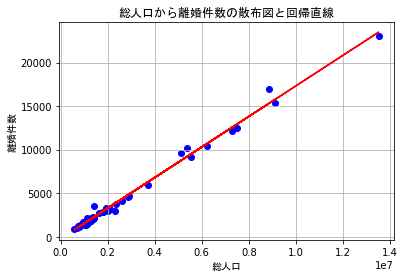

In [23]:
lr_XZ.fit(Z, X) # 線形モデルの重みを学習

print('coefficient = ', lr_XZ.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr_XZ.intercept_) # 切片を出力

#図の作成
plt.scatter(Z, X, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(Z, lr_XZ.predict(Z.reshape(-1, 1)), color = 'red') # 回帰直線をプロット

plt.title('総人口から離婚件数の散布図と回帰直線', fontname="MS Gothic") # 図のタイトル
plt.xlabel('総人口', fontname="MS Gothic")                    # x軸のラベル
plt.ylabel('離婚件数', fontname="MS Gothic")                  # y軸のラベル
plt.grid()   # グリッド線を表示

plt.show()                                 # 図の表示

[-174.29060402 -247.71670605   50.81830808 -367.80711873  934.65200608
 -328.23243806  250.50548955 -357.03783508  123.89321722 1654.24373772
 -111.33381808 -132.85322213  422.1047471  -250.70256715  -43.21283584
 -290.66040001  135.13869559 -374.19247319   97.39583311 -157.74271763
   43.69377833 -158.48487649   70.03968214  112.92968856 -426.91485417
 -912.87738041 -422.4900112   -21.08556165 1196.21090812  -47.57174309
  -47.2095303  -257.48160551 -409.66878912  -70.34246478  885.04513598
   69.52527974 -201.91973791  -80.08615354 -195.49259654  -99.90783728
 -242.52791394   23.97216822 -280.34729928  198.25944345  220.19560204
  114.7555633   106.81180684]


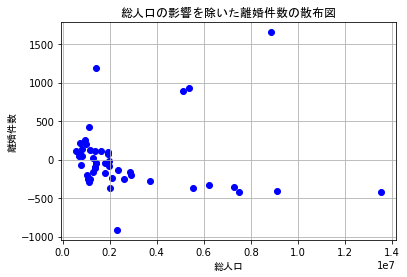

In [27]:
# 残差を計算
XZ = X-lr_XZ.predict(Z)

print(XZ)

#残差の図の作成
plt.scatter(Z, XZ, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.title('総人口の影響を除いた離婚件数の散布図', fontname="MS Gothic") # 図のタイトル
plt.xlabel('総人口', fontname="MS Gothic")                    # x軸のラベル
plt.ylabel('離婚件数', fontname="MS Gothic")                  # y軸のラベル
plt.grid()   # グリッド線を表示

plt.show()                                 # 図の表示

In [11]:
# 同様の残差を総人口×大家族世帯で実施
lr_YZ.fit(Z, Y)                         # 線形モデルの重みを学習
print('coefficient = ', lr_YZ.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr_YZ.intercept_) # 切片を出力

coefficient =  0.02534621490952352
intercept =  41235.452752317244


In [12]:
# 残差を計算
YZ = Y - lr_YZ.predict(Z)
print(YZ)

[ -1256.757289   -19044.02088004 -10251.59160785   4303.31696645
 -12360.01395599  26526.5175015  -25066.53316862  17866.41483632
 -20304.70635746 -15190.53371239 -20836.69929282  34708.04161656
 -29641.42290126   5564.16859564 -24218.01587596  27034.1644268
 -20456.76796673  28364.49713438   1731.16164366  16125.68272675
 -11387.64776717 -16615.83449285 -21010.42378454 -22107.60111031
  62683.57676421  64942.1766954  -58426.41607877  19192.65573148
 -26843.9246753   -8437.52533742   4572.89856274  -8963.18752763
 -30250.43410662  -2836.33387024   8120.41249871  41530.90340847
  10816.35319567   2574.55041648  44599.24666576 -14780.93042492
  27706.81001072  10161.98139907  73947.8214869  -21285.02455853
 -32172.49276177 -18141.01157625 -41187.50120325]


In [13]:
# 偏相関係数の算出
np.corrcoef(XZ,YZ)

array([[ 1.        , -0.38777088],
       [-0.38777088,  1.        ]])

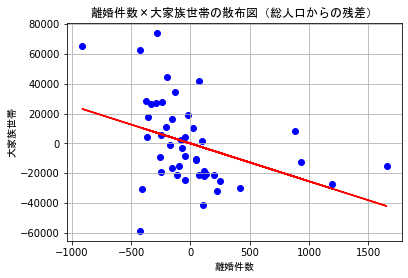

In [14]:
lr_XYZ.fit(XZ.reshape(-1, 1), YZ)  #回帰分析の実行

plt.scatter(XZ, YZ, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(XZ, lr_XYZ.predict(XZ.reshape(-1, 1)), color = 'red') # 回帰直線をプロット

# 図の設定
plt.title('離婚件数×大家族世帯の散布図（総人口からの残差）', fontname="MS Gothic") # 図のタイトル
plt.xlabel('離婚件数', fontname="MS Gothic")                    # x軸のラベル
plt.ylabel('大家族世帯', fontname="MS Gothic")                  # y軸のラベル
plt.grid()   # グリッド線を表示

plt.show()                                 # 図の表示

In [15]:
# 偏相関係数のみ算出
correlation_matrix = np.corrcoef((SSDSE5['離婚件数'], SSDSE5['大家族世帯数'], SSDSE5['総人口']))

r_xy = correlation_matrix[0, 1]
r_xz = correlation_matrix[0, 2]
r_yz = correlation_matrix[1, 2]

r_xy_z = (r_xy - r_xz * r_yz) / (math.sqrt(1 - r_xz * r_xz) * math.sqrt(1 - r_yz * r_yz)) 

print(r_xy_z)

-0.38777088070607363


##  <font color='blue'> 練習問題． 「夫が外で働き、妻が家を守る意識×離婚率」図13の作成
    
    ○○を埋めてプログラムを完成させ、図13を作成しなさい

In [28]:
# chiiki_dansei.csvの読み込み
dans1 = ○○.○○('./in/chiiki_dansei.csv',
                     names=('質問列','地域情報','男性_総数','男性_割合_そう思う','男性_割合_ややそう思う',
                            '男性_割合_あまりそう思わない','男性_割合_そう思わない',
                            'var_null1','var_null2','var_null3','var_null4','var_null5','var_null6',
                            'var_null7','var_null8','var_null9','var_null10'),
                     index_col=None, 
                     engine='python',
                     skiprows=○○,
                     nrows=○○ #読み込み行数の指定
                    )
dans1.head(5)

SyntaxError: invalid character in identifier (<ipython-input-28-da026f967206>, line 2)

In [18]:
#男性調査
dans2 = dans1[['地域情報','男性_総数','男性_割合_そう思う','男性_割合_ややそう思う',
               '男性_割合_あまりそう思わない','男性_割合_そう思わない']]
print(dans2.head(5))

  地域情報  男性_総数  男性_件数_そう思う  男性_件数_ややそう思う  男性_件数_あまりそう思わない  男性_件数_そう思わない
0  NaN  11646        11.1          33.3             38.7          16.9
1  北海道    240        14.6          28.8             37.5          19.2
2  青森県    244         8.2          33.6             38.5          19.7
3  岩手県    248         6.9          29.0             42.7          21.4
4  宮城県    249        12.0          36.1             36.5          15.3


In [19]:
#都道府県名で横結合
SSDSE6 = pd.merge(SSDSE5, dans2, #結合するデータを指定
                  left_on='都道府県', #結合する変数を指定（SSDSE3）
                  right_on='地域情報', #結合する変数を指定（dans2
                  how='inner') #結合の方法を指定：innerはどちらのデータにも存在している
SSDSE6.head()

,都道府県,総人口,一般世帯数,核家族世帯数,単独世帯数,離婚件数,離婚率,大家族世帯数,地域情報,男性_総数,男性_件数_そう思う,男性_件数_ややそう思う,男性_件数_あまりそう思わない,男性_件数_そう思わない
0,三重県,1815865,718934,421428,211502,2784,1.533154,86004,三重県,249,11.2,38.6,35.7,14.5
1,京都府,2610353,1151422,623063,440005,4104,1.572201,88354,京都府,244,13.5,33.2,38.9,14.3
2,佐賀県,832832,301009,168039,80877,1285,1.542928,52093,佐賀県,242,9.9,33.1,39.3,17.8
3,兵庫県,5534800,2312284,1370236,756223,9113,1.646491,185825,兵庫県,244,15.2,34.0,36.9,13.9
4,北海道,5381733,2438206,1363818,909106,10147,1.885452,165282,北海道,240,14.6,28.8,37.5,19.2


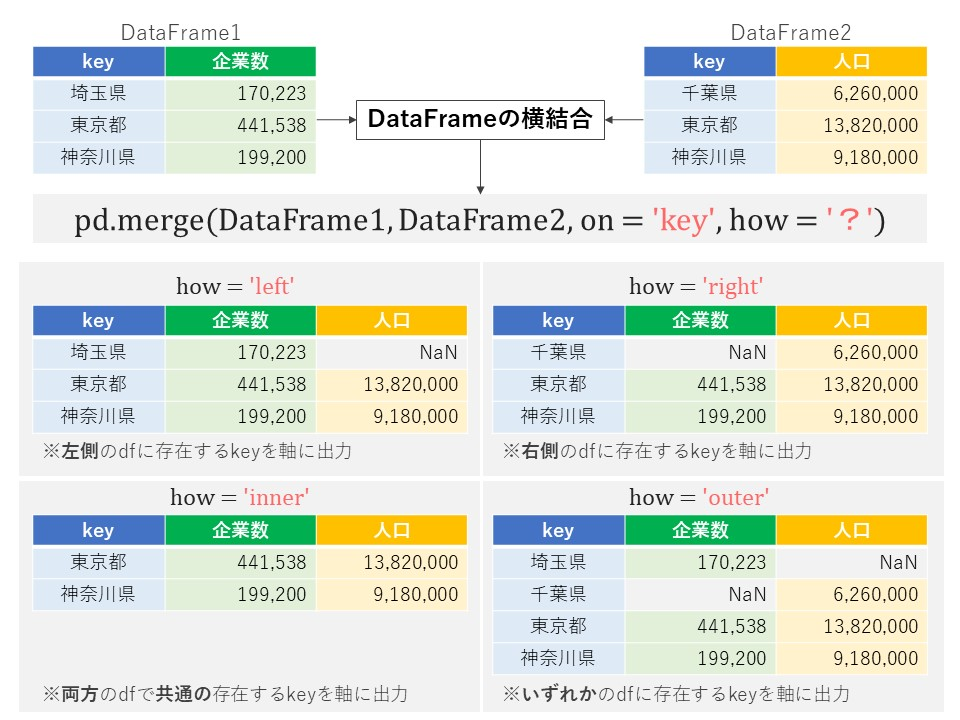

In [20]:
# 新しい列の作成：男性の「そうおもう」意識割合
SSDSE7=SSDSE6.assign(男性意識_夫外妻家 = SSDSE6['○○'] + ○○[○○])
SSDSE7.head(5)

,都道府県,総人口,一般世帯数,核家族世帯数,単独世帯数,離婚件数,離婚率,大家族世帯数,地域情報,男性_総数,男性_件数_そう思う,男性_件数_ややそう思う,男性_件数_あまりそう思わない,男性_件数_そう思わない,男性意識_夫外妻家
0,三重県,1815865,718934,421428,211502,2784,1.533154,86004,三重県,249,11.2,38.6,35.7,14.5,49.8
1,京都府,2610353,1151422,623063,440005,4104,1.572201,88354,京都府,244,13.5,33.2,38.9,14.3,46.7
2,佐賀県,832832,301009,168039,80877,1285,1.542928,52093,佐賀県,242,9.9,33.1,39.3,17.8,43.0
3,兵庫県,5534800,2312284,1370236,756223,9113,1.646491,185825,兵庫県,244,15.2,34.0,36.9,13.9,49.2
4,北海道,5381733,2438206,1363818,909106,10147,1.885452,165282,北海道,240,14.6,28.8,37.5,19.2,43.4


In [21]:
# データ設定
X = SSDSE7['○○'].values         # 目的変数（Numpyの配列）
Y = SSDSE7['○○'].values         # 目的変数（Numpyの配列）

In [22]:
# 図12の作成
lr21 = linear_model.LinearRegression()

lr21.fit(X.reshape(-1, 1), Y.reshape(-1, 1))                         # 線形モデルの重みを学習

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

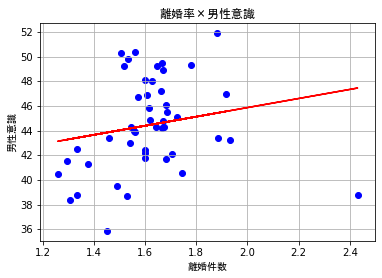

In [23]:
plt.scatter(X, Y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X, lr21.predict(X.reshape(-1, 1)), color = 'red') # 回帰直線をプロット

plt.title('離婚率×男性意識', fontname="MS Gothic") # 図のタイトル
plt.xlabel('離婚件数', fontname="MS Gothic")                    # x軸のラベル
plt.ylabel('男性意識', fontname="MS Gothic")                  # y軸のラベル
plt.grid()   # グリッド線を表示

plt.show()                                 # 図の表示

In [24]:
# 相関係数の算出
np.corrcoef(X,Y)

array([[1.        , 0.19244697],
       [0.19244697, 1.        ]])

In [25]:
# 図13の作成
#沖縄除去
SSDSE8 = SSDSE7[(SSDSE7['都道府県'] != '沖縄県')]

# !=：等しくない
# ==：等しい

In [26]:
# データ設定
X = SSDSE8['○○'].values         # 目的変数（Numpyの配列）
Y = SSDSE8['○○'].values         # 目的変数（Numpyの配列）

In [ ]:
#可視化
lr22 = linear_model.LinearRegression()

lr22.fit(X.reshape(-1, 1), Y.reshape(-1, 1))                         # 線形モデルの重みを学習

plt.scatter(X, Y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X, lr22.predict(X.reshape(-1, 1)), color = 'red') # 回帰直線をプロット

plt.title('離婚率×男性意識', fontname="MS Gothic") # 図のタイトル
plt.xlabel('離婚件数', fontname="MS Gothic")                    # x軸のラベル
plt.ylabel('男性意識', fontname="MS Gothic")                  # y軸のラベル
plt.grid()   # グリッド線を表示

plt.show()                                 # 図の表示

### これと同じものができればOK！

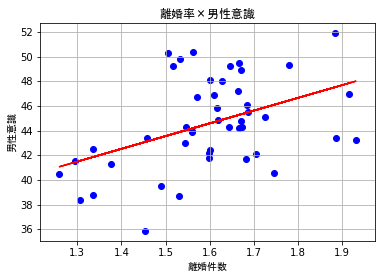


In [28]:
# 相関係数の算出
np.corrcoef(X,Y)

array([[1.        , 0.43440764],
       [0.43440764, 1.        ]])